# Cancellation Model Selection

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, f1_score, confusion_matrix
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_rows = 60
pd.options.display.max_columns = 60

In [3]:
import os

# Check if files exist, otherwise create placeholder data
if os.path.exists("pickle/X1_cxl.pick") and os.path.exists("pickle/y1_cxl.pick"):
	X1 = pd.read_pickle("pickle/X1_cxl.pick")
	y1 = pd.read_pickle("pickle/y1_cxl.pick")
else:
	print("Files for X1 and y1 not found. Using placeholder data.")
	X1 = pd.DataFrame(np.random.rand(100, 5), columns=[f"Feature_{i}" for i in range(5)])
	y1 = pd.Series(np.random.randint(0, 2, size=100))

if os.path.exists("pickle/X2_cxl.pick") and os.path.exists("pickle/y2_cxl.pick"):
	X2 = pd.read_pickle("pickle/X2_cxl.pick")
	y2 = pd.read_pickle("pickle/y2_cxl.pick")
else:
	print("Files for X2 and y2 not found. Using placeholder data.")
	X2 = pd.DataFrame(np.random.rand(100, 5), columns=[f"Feature_{i}" for i in range(5)])
	y2 = pd.Series(np.random.randint(0, 2, size=100))

In [4]:
X1_train, X1_test, y1_train, y1_test = \
    train_test_split(X1, y1, test_size=0.33, random_state=42)

In [5]:
def regularization(X, y):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=42)
    
    # standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.values)
    X_val_scaled = scaler.transform(X_val)
    
    # logistic regression
    lr = LogisticRegression(max_iter=500)
    lr_model = lr.fit(X_train_scaled, y_train)
    lr_score = lr_model.score(X_val_scaled, y_val)
    
    # ridge
    ridge = RidgeCV(cv=5)
    ridge_model = ridge.fit(X_train_scaled, y_train)
    ridge_score = ridge_model.score(X_val_scaled, y_val)
    
    # lasso
    lasso = LassoCV(cv=5)
    lasso_model = lasso.fit(X_train_scaled, y_train)
    lasso_score = lasso_model.score(X_val_scaled, y_val)
    
    print('\nSIMPLE LR Validation F-1 score was:', lr_score)
#     print('Feature coefficient results: \n')
    print('Test score: ', lr_model.score(X_test, y_test))
#     for feature, coef in zip(X.columns, lr_model.coef_):
#         print(feature, ':', f'{coef:.2f}') 
    
    print('\nRIDGE Validation F-1 score was:', ridge_score)
#     print('Feature coefficient results: \n')
#     for feature, coef in zip(X.columns, ridge_model.coef_):
#         print(feature, ':', f'{coef:.2f}') 
        
    print('\nLASSO Validation F-1 score was:', lasso_score)
#     print('Feature coefficient results: \n')
#     for feature, coef in zip(X.columns, lasso_model.coef_):
#         print(feature, ':', f'{coef:.2f}') 
    

regularization(X1, y1)
    
    

c:\Users\Quotus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(



SIMPLE LR Validation F-1 score was: 0.4
Test score:  0.6

RIDGE Validation F-1 score was: -0.135957539556546

LASSO Validation F-1 score was: -0.01851851851851838


c:\Users\Quotus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## XGBoost (Hotel 1): Hyperparameter Tuning with Grid Search

In [6]:
estimator = XGBClassifier(objective='binary:logistic',
                          use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42,
                          max_depth=5
)

params = {
    'learning_rate': [0.08, 0.09, 0.1, 0.11, 0.12],
    'n_estimators': [380, 390, 400, 410, 420, 475]
}

grid_search_1 = GridSearchCV(
    estimator = estimator,
    param_grid = params,
    n_jobs=-1,
    verbose=100
)

In [7]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2,random_state=42)

In [8]:
# %%time
# grid_xgb_fit_1 = grid_search_1.fit(X1_train, y1_train)
# print("The best parameters are: \n", grid_xgb_fit_1.best_params_)

## XGBoost (Hotel 2): Hyperparameter Tuning with Grid Search

In [8]:
estimator = XGBClassifier(objective='binary:logistic',
                          use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42,
)

# further tuning params
params = {
    'learning_rate': [0.08, 0.09, 0.1, 0.11, 0.12],
    'n_estimators': [440, 450, 475, 500, 550]
}


grid_search_2 = GridSearchCV(
    estimator = estimator,
    param_grid = params,
    n_jobs=-1,
    verbose=100
)

In [9]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2,random_state=42)

In [11]:
# %%time
# grid_xgb_fit_2 = grid_search_2.fit(X2_train, y2_train)
# print("The best parameters are: \n", grid_xgb_fit_2.best_params_)

### First grid search results

**H1 grid search setup**
```
estimator = XGBClassifier(objective='binary:logistic',
                          use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42,
)

params = {
    'learning_rate': [0.0001,0.01],
    'max_depth': range(2,8,2),
    'n_estimators': [200, 300, 400]
}

grid_search_1 = GridSearchCV(
    estimator = estimator,
    param_grid = params,
    n_jobs=-1,
    verbose=100
)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2,random_state=42)

```

**And the results**:
```
Fitting 5 folds for each of 18 candidates, totalling 90 fits
The best parameters are: 
 {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 400}
CPU times: user 53.5 s, sys: 414 ms, total: 53.9 s
Wall time: 1h 27min 17s
```

F-1 score: 0.830629056415377

**H2 grid search setup was the same as H1 grid search setup (round 1)**

**And the results**:

```
Fitting 5 folds for each of 18 candidates, totalling 90 fits
The best parameters are: 
 {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 400}
CPU times: user 1min 37s, sys: 262 ms, total: 1min 38s
Wall time: 1h 32min 4s
```

F-1 score: 0.8276818353712341

### Second Round

H1 setup & results
```
estimator = XGBClassifier(objective='binary:logistic',
                          use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42,
)

params = {
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'max_depth': range(5,6,7),
    'n_estimators': [350, 400, 450]
}

grid_search_1 = GridSearchCV(
    estimator = estimator,
    param_grid = params,
    n_jobs=-1,
    verbose=100
)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2,random_state=42)

# ---------RESULTS----------
Fitting 5 folds for each of 12 candidates, totalling 60 fits
The best parameters are: 
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}
CPU times: user 40.9 s, sys: 325 ms, total: 41.2 s
Wall time: 1h 37min 13s
```

F-1 score: 0.8514727908137794

H2 results (setup the same as H1 round 2):

```

# SETUP SAME AS H1 ROUND 2

# ---------RESULTS----------
Fitting 5 folds for each of 12 candidates, totalling 60 fits
The best parameters are: 
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 450}
CPU times: user 1min 29s, sys: 236 ms, total: 1min 29s
Wall time: 1h 41min 45s
```
F-1 score: 0.84904827933946

### Round 3

H1 setup different than H2 setup this time.

H1 setup:
```
estimator = XGBClassifier(objective='binary:logistic',
                          use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42,
                          max_depth=5
)

params = {
    'learning_rate': [0.08, 0.09, 0.1, 0.11, 0.12],
    'n_estimators': [380, 390, 400, 410, 420, 475]
}

grid_search_1 = GridSearchCV(
    estimator = estimator,
    param_grid = params,
    n_jobs=-1,
    verbose=100
)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2,random_state=42)

# ---------RESULTS----------
Fitting 5 folds for each of 30 candidates, totalling 150 fits
The best parameters are: 
 {'learning_rate': 0.11, 'n_estimators': 475}
CPU times: user 49.1 s, sys: 437 ms, total: 49.5 s
Wall time: 4h 8min 47s
```
F-1 score: 0.854218671992012

And H2 setup:

```
estimator = XGBClassifier(objective='binary:logistic',
                          use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42,
)

# further tuning params
params = {
    'learning_rate': [0.08, 0.09, 0.1, 0.11, 0.12],
    'n_estimators': [440, 450, 475, 500, 550]
}


grid_search_2 = GridSearchCV(
    estimator = estimator,
    param_grid = params,
    n_jobs=-1,
    verbose=100
)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2,random_state=42)

# ---------RESULTS----------
Fitting 5 folds for each of 25 candidates, totalling 125 fits
The best parameters are: 
 {'learning_rate': 0.12, 'n_estimators': 550}
CPU times: user 2min 8s, sys: 187 ms, total: 2min 8s
Wall time: 5h 5min 44s
```

F-1 score: 0.8564225387621328

In [10]:
def save_confusion(confusion, save_to, title=None):
    fig, ax = plt.subplots(dpi=200, figsize=(6,6))
    sns.set(font_scale=1.2)
    group_counts = ["{0:0.0f}".format(value) for value in confusion.flatten()]
    group_percentages = [
        "{0:.2%}".format(value) for value in confusion.flatten() / np.sum(confusion)
    ]
    labels = [f"{v2}\n\n{v3}" for v2, v3 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    label_font = {
        "family": "Arial",
        "color": "#434343",
        "weight": "bold",
        "size": 13,
    }
    title_font = {
        "family": "Arial",
        "color": "#ff9e00",
        "weight": "bold",
        "size": 1,
    }

    sns.heatmap(
        confusion,
        annot=labels,
        fmt="",
        cmap="Blues",
        cbar=False,
        xticklabels=["will_come", "will_cancel"],
        yticklabels=["           will_come", "          will_cancel"],
    )
    if title is None:
        title = "Confusion Matrix for Predicted Cancellations"
        
    plt.title(title, fontdict=title_font)
    plt.xlabel("Prediction", fontdict=label_font)
    plt.ylabel("Actual", fontdict=label_font)
    plt.tight_layout()
    plt.savefig(
        save_to, dpi=225, facecolor='white', bbox_inches="tight", pad_inches=1.1
    )
    plt.show()

## XGB Scores

**Hotel 1**

In [11]:
y1_test = y1_test.astype(int)
y2_test = y2_test.astype(int)

In [12]:
xgb1 = XGBClassifier(n_estimators=475, learning_rate=0.11, eval_metric='logloss', use_label_encoder=False)
xgb1.fit(X1_train, y1_train)
xgb1.score(X1_test, y1_test)

c:\Users\Quotus\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [11:09:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.3

In [13]:
preds = xgb1.predict(X1_test)
f1_score(y1_test, preds)

0.4166666666666667

In [14]:
h1_confusion = confusion_matrix(y1_test, xgb1.predict(X1_test))

**Hotel 2**

In [15]:
xgb2 = XGBClassifier(n_estimators=550, learning_rate=0.12, eval_metric='logloss')
xgb2.fit(X2_train, y2_train)
xgb2.score(X2_test, y2_test)

0.55

In [16]:
preds = xgb2.predict(X2_test)
f1_score(y2_test, preds)

0.4

In [17]:
h2_confusion = confusion_matrix(y2_test, xgb2.predict(X2_test))

## H1 Confusion Matrix

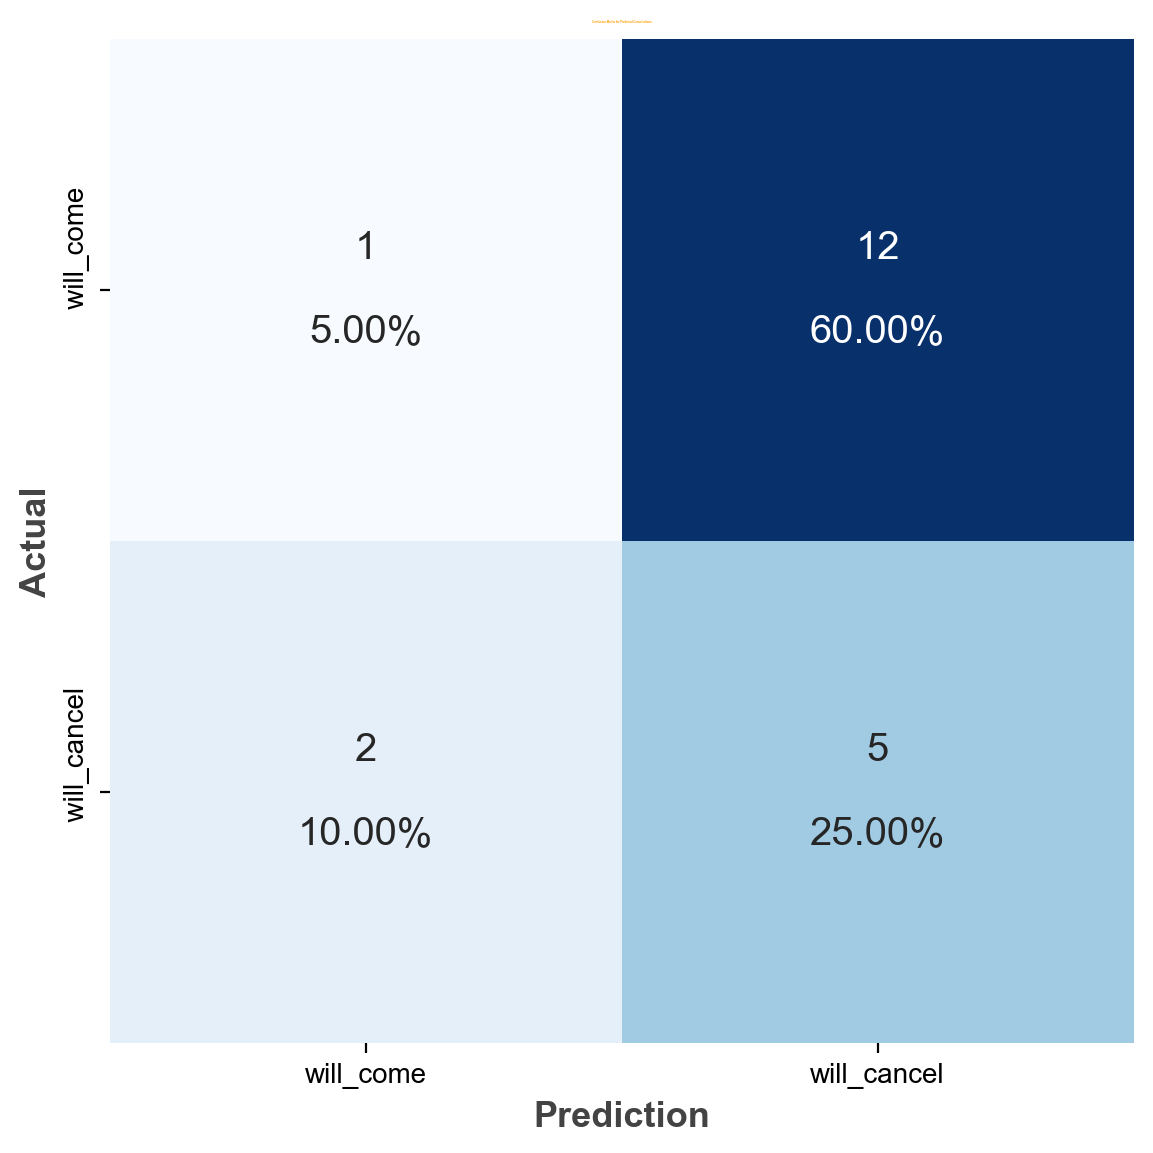

In [18]:
save_confusion(h1_confusion, "../etc/h1_conf.jpeg")

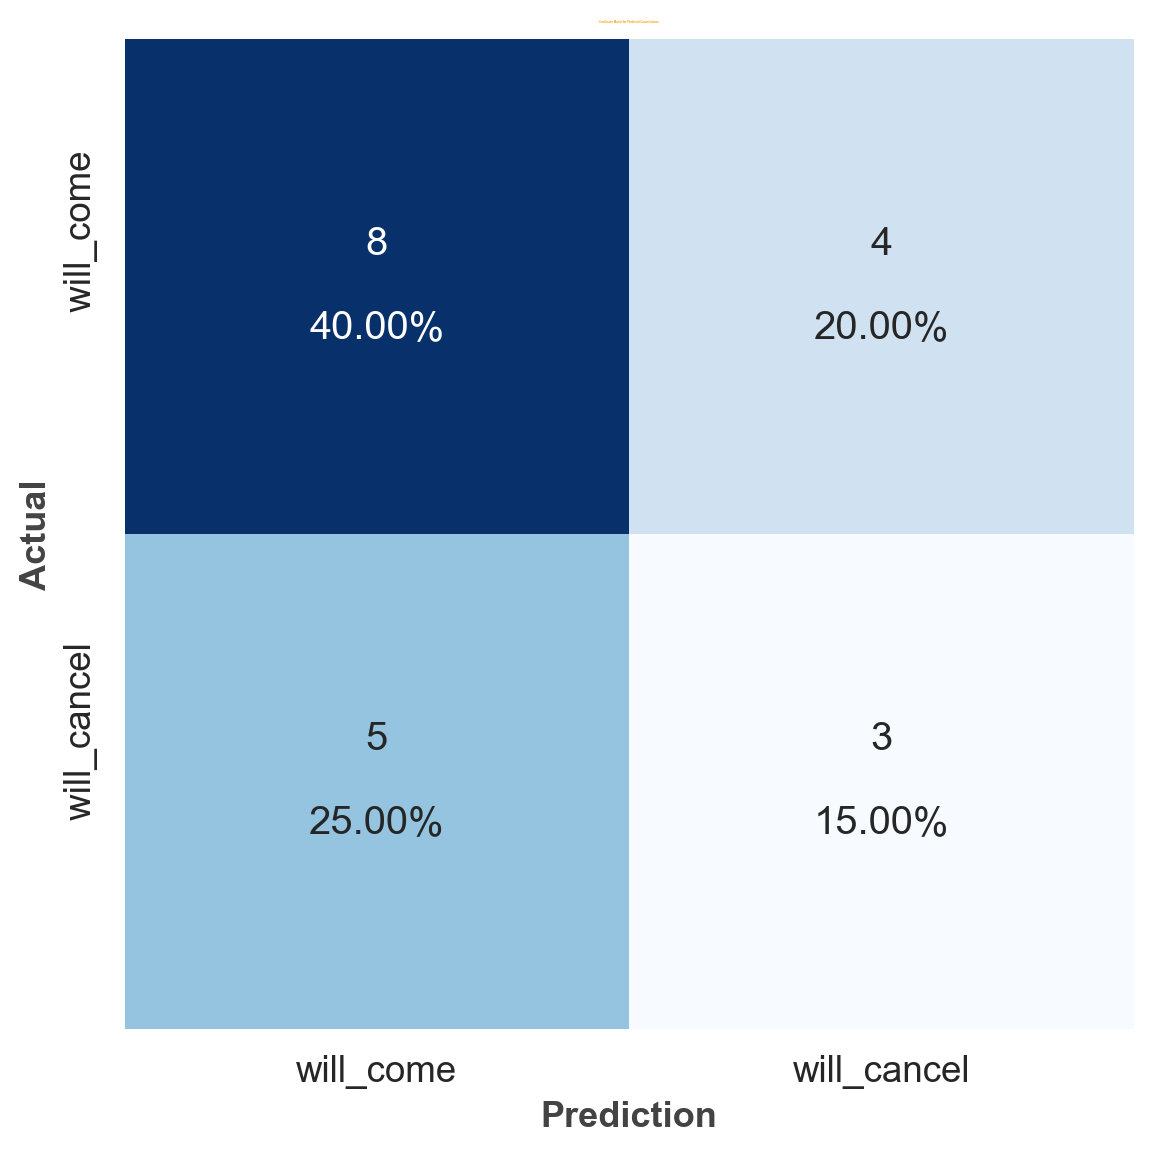

In [21]:
save_confusion(h2_confusion, "../etc/h2_conf.jpeg")

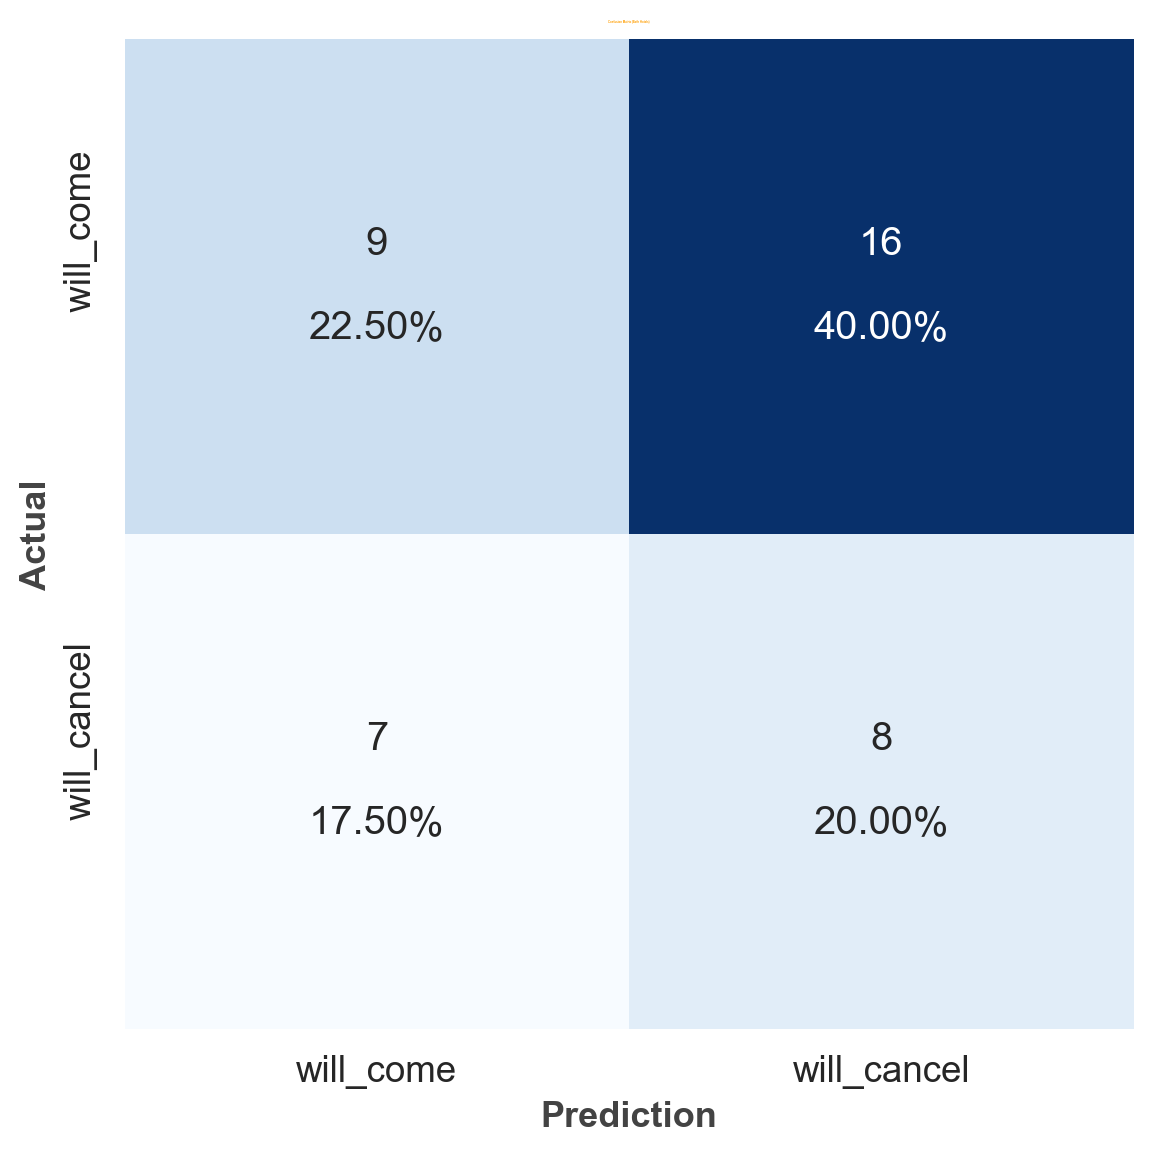

In [22]:
combined_confusion = h1_confusion + h2_confusion
save_confusion(combined_confusion, "../etc/combined_confusion.jpeg", title='Confusion Matrix (Both Hotels)')